<a href="https://colab.research.google.com/github/akshpesa/FMML/blob/main/module_7_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Anomaly/Outlier Detection

In [ ]:
#import neccessary libraries
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cv2

In [ ]:
image_location = 'https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Charminar-Pride_of_Hyderabad.jpg/330px-Charminar-Pride_of_Hyderabad.jpg'

Image shape = (412, 330, 3)


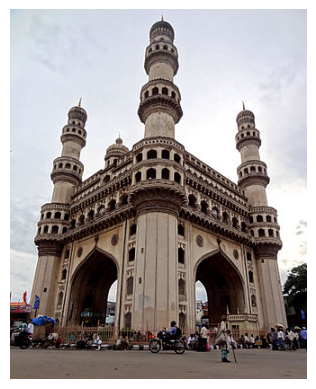

Total Pixels = 135960
Data Sample: 


array([[181, 197, 212],
       [182, 198, 213],
       [184, 200, 215]], dtype=uint8)

In [ ]:
image = io.imread(image_location)

#Lets check out the dimensions of the numerical representation of the image
print("Image shape = " + str(image.shape))

#View the image using matplotlib
plt.imshow(image)
plt.axis(False)
plt.show()

#Extract the numerical representations of pixels with (R,G,B) values
#it converts the MxNx3 image into a Kx3 matrix where K=MxN
# Each row is now a vector in the 3-D space of RGB
all_pixels = image.reshape((-1,3))
print("Total Pixels = " + str(len(all_pixels)))

#Peek into the data to understand coordinates
print("Data Sample: ")
all_pixels[:3]

CLUSTER-LEVEL DOMINANT COLOURS (K = 3)


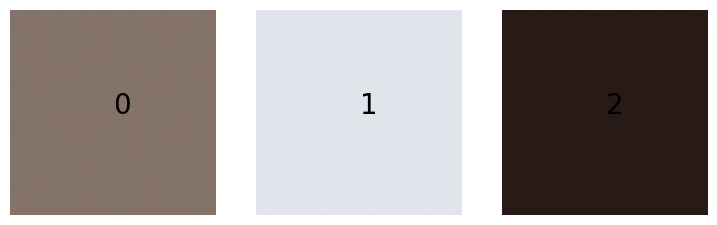

In [ ]:
#Update the optimal value of k below
k=3

#Build a clustering model on the pixels
kmeans = KMeans(n_clusters=k)
kmeans.fit(all_pixels)
kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint")

fig, axs = plt.subplots(1, k)
fig.set_size_inches(3 * k, 3, forward=True)
for clusternumber in range(0,len(kmeans_centroids)):
  centroid = np.zeros((100,100,3))
  centroid[:,:,:] = kmeans_centroids[clusternumber]
  axs[clusternumber].imshow(centroid/255)
  axs[clusternumber].text(50,50,str(clusternumber),fontsize=20)
  axs[clusternumber].axis("off")

print("CLUSTER-LEVEL DOMINANT COLOURS (K = " + str(k) + ")")
plt.show()

In [ ]:
#Let us "compress" the image
#This is done by assigning each pixel to be the dominant colour of the cluster it belongs to.
image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
for ix in range(all_pixels.shape[0]):
    image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
image_compressed = image_compressed.reshape(image.shape)

Total Pixels = 135960


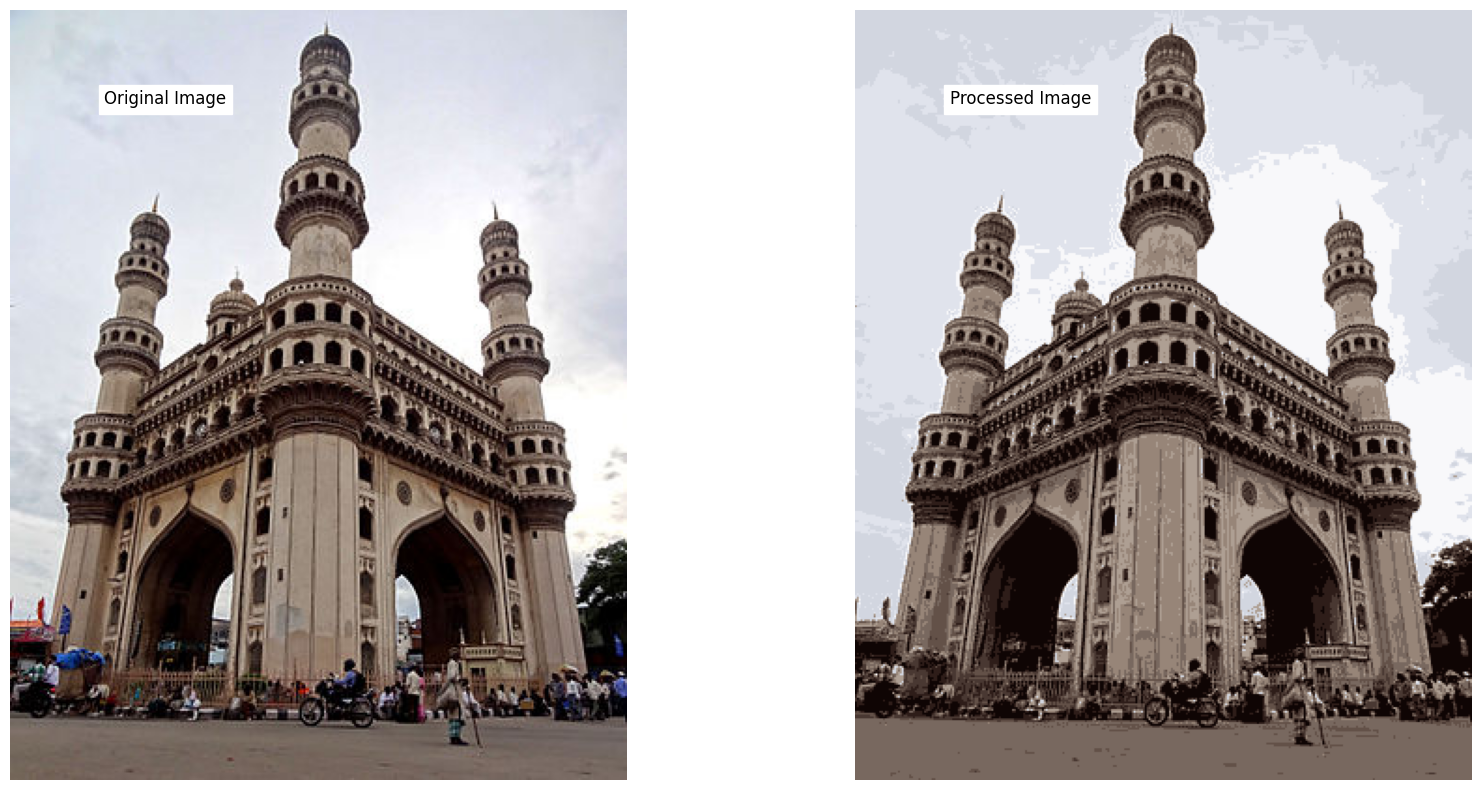

[[[181 197 212]
  [182 198 213]
  [184 200 215]
  ...
  [199 203 215]
  [198 202 214]
  [198 202 214]]

 [[182 198 213]
  [183 199 214]
  [185 201 216]
  ...
  [199 203 215]
  [199 203 215]
  [199 203 215]]

 [[184 200 215]
  [185 201 216]
  [186 202 217]
  ...
  [200 204 216]
  [201 205 217]
  [201 205 217]]

 ...

 [[115 101  88]
  [115 101  88]
  [115 101  88]
  ...
  [122 107 100]
  [121 106  99]
  [121 106  99]]

 [[115 101  88]
  [115 101  88]
  [116 102  89]
  ...
  [122 107 100]
  [121 106  99]
  [121 106  99]]

 [[117 103  90]
  [117 103  90]
  [118 104  91]
  ...
  [121 106  99]
  [124 107 100]
  [124 107 100]]] [[[210 214 224]
  [210 214 224]
  [210 214 224]
  ...
  [210 214 224]
  [210 214 224]
  [210 214 224]]

 [[210 214 224]
  [210 214 224]
  [210 214 224]
  ...
  [210 214 224]
  [210 214 224]
  [210 214 224]]

 [[210 214 224]
  [210 214 224]
  [210 214 224]
  ...
  [210 214 224]
  [210 214 224]
  [210 214 224]]

 ...

 [[120 104  95]
  [120 104  95]
  [120 104  95]
  ..

In [ ]:
#Let us compare our image and compressed image
fig, axs = plt.subplots(1, 2)
fig.set_size_inches(20, 10, forward=True)

axs[0].imshow(image)
axs[0].text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[0].axis(False)

axs[1].imshow(image_compressed)
axs[1].text(50,50,"Processed Image", fontsize=12, c = 'black', backgroundcolor = 'white')
axs[1].axis(False)

all_pixels = image_compressed.reshape((-1,3))
print("Total Pixels = " + str(len(all_pixels)))

plt.show()

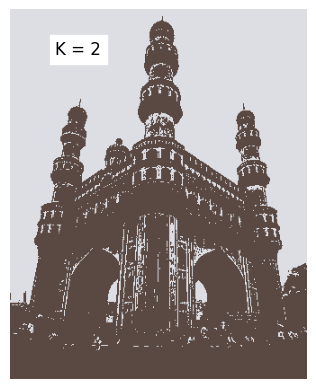

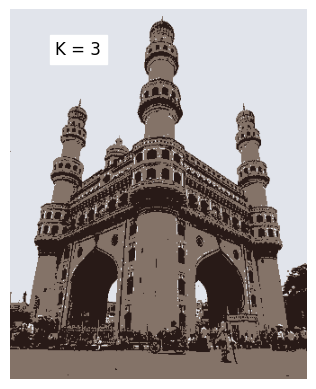

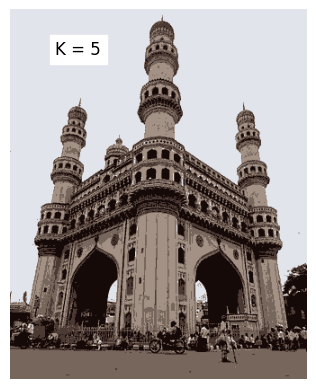

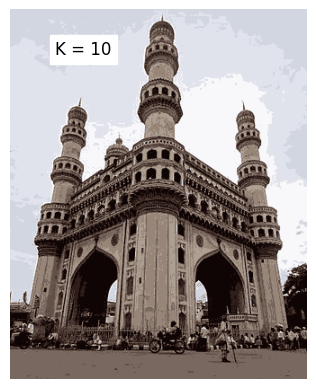

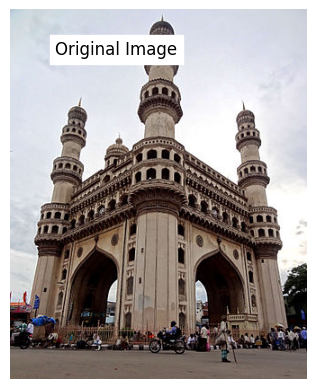

In [ ]:
K = [2, 3, 5, 10]
for k in K:

  # print("K =", k)
  #Build a clustering model on the pixels
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(all_pixels)
  kmeans_centroids = np.array(kmeans.cluster_centers_, dtype="uint")

  image_compressed = np.zeros((all_pixels.shape[0], 3), dtype="uint")
  for ix in range(all_pixels.shape[0]):
      image_compressed[ix] = kmeans_centroids[kmeans.labels_[ix]]
  image_compressed = image_compressed.reshape(image.shape)

  plt.imshow(image_compressed)
  plt.text(50,50,"K = " + str(k), fontsize=12, c = 'black', backgroundcolor = 'white')
  plt.axis(False)
  plt.show()

plt.imshow(image)
plt.text(50,50,"Original Image", fontsize=12, c = 'black', backgroundcolor = 'white')
plt.axis(False)
plt.show()

### Exercise

* Upload your own image and play with different K values
* Figure out how do we evaluate emage compressions and implement any one of them

PSNR: 33.26 dB


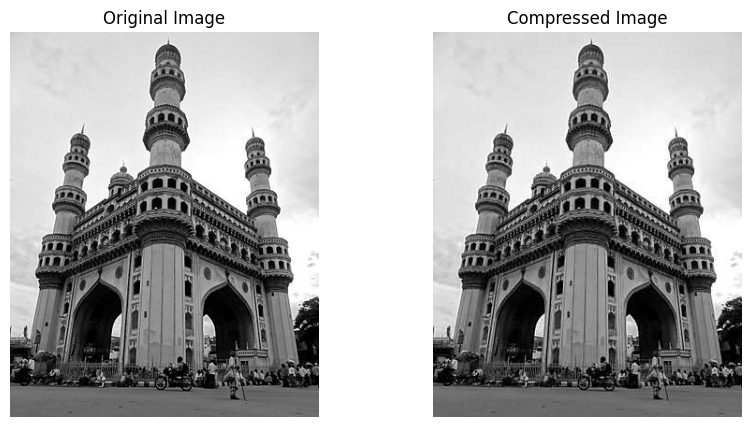

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
import PIL.Image
import io

def calculate_psnr(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:
        return float('inf')
    psnr = 10 * np.log10((255 ** 2) / mse)
    return psnr

url = "https://upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Charminar-Pride_of_Hyderabad.jpg/330px-Charminar-Pride_of_Hyderabad.jpg"
response = requests.get(url, stream=True)
if response.status_code == 200:
    image = PIL.Image.open(io.BytesIO(response.content))
else:
    raise Exception("Failed to download the image.")

image = image.convert('L')
image_np = np.array(image)

compressed_path = "compressed_charminar.jpg"
image.save(compressed_path, "JPEG", quality=50)

compressed_image = cv2.imread(compressed_path, cv2.IMREAD_GRAYSCALE)
if compressed_image is None:
    raise FileNotFoundError(f"Compressed image not found at {compressed_path}.")

psnr_value = calculate_psnr(image_np, compressed_image)
print(f'PSNR: {psnr_value:.2f} dB')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(image_np, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(compressed_image, cmap='gray')
axs[1].set_title('Compressed Image')
axs[1].axis('off')

plt.show()
